In [1]:
# Ecuacion de regresión multiple
# y = m1x1 + m2x2 + ... + mxnx + b

# Predecir las ventas futuras a partir de los presupuestos de publicidad de cada mes con regresión lineal.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)

print("Vista del Dataset")
df.head()

Vista del Dataset


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
print("\nInformación general del Dataset")
df.info()


Información general del Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
# Verifiacicón y limpieza de datos nulos
print("\nVerificación de datos nulos")
df.isnull().sum()


Verificación de datos nulos


Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [4]:
# División del conjunto de datos
# Dividir una cantidad para prueba y otra cantidada para train

# Variables independientes (quitar variable'sales'), TV, radio, newspaper.
x = df.drop('sales', axis=1)

# Variable dependiente (objetivo), sales.
y = df['sales']

# Dividir los datos en 4 conjuntos
# text_size: el 20% de los datos se reservan para prueba.
# - Para las variables test: 20%
# - Para las variables train: 80%
# random_state: valor de semilla = 42, tener una divisón fija
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {x_train.shape}")
print(f"Datos de prueba: {x_test.shape}")

Datos de entrenamiento: (160, 4)
Datos de prueba: (40, 4)


In [5]:
# Escalamiento de carácteristicas

# Crear objeto para aplicar estandarización
# - tranforma cada variable para que tenga: Media = 0, Desviación estándar = 1.
scaler = StandardScaler()

scaler.fit(x_train)

# Usar las medias y desviaciones calculadas para estandarizar
# transform aplica la transformación a datos (x - media / std)
x_train_scaled = scaler.transform(x_train)

# Transformar el conjunto de prueba
x_test_scaled = scaler.transform(x_test)

In [6]:
# Primeras predicciones

model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print("Primeras predicciones")
print(y_pred[:10])

Primeras predicciones
[16.41227699 20.84319293 21.51186915 10.65309994 22.12405753 13.12383506
 21.03748883  7.50385439 13.64787029 15.12040886]


In [7]:
# Evaluación del modelo

# MAE:
# Es el promedio de las diferencias absolutas entre valores reales y predichos
mae = mean_absolute_error(y_test, y_pred)

# MSE:
# Promedo de los cuadrados de los errores
mse = mean_squared_error(y_test, y_pred)

# RMSE:
# Raíz cuadrada del MSE, es la desviación estandar de los errores pedicción
rmse = np.sqrt(mse)

# r^2:
# Indica que tan bien el modelo se ajusta a los datos.
# 1 ajuste perfecto, modelo explica toda  la variabilidad. (ajustado)
# 0 no explica nada de la variabilidad dependiente.
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrátio medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"Coeficiente de determinación (R^2): {r2}")
print(f"El modelo explica el {r2*100:.2f}% de la varianza.")

Evaluación del modelo
Error absoluto medio (MAE): 1.4650601050102923
Error cuadrátio medio (MSE): 3.1990044685889005
Raíz del error cuadrático medio (RMSE): 1.7885761008659655
Coeficiente de determinación (R^2): 0.8986489151417081
El modelo explica el 89.86% de la varianza.


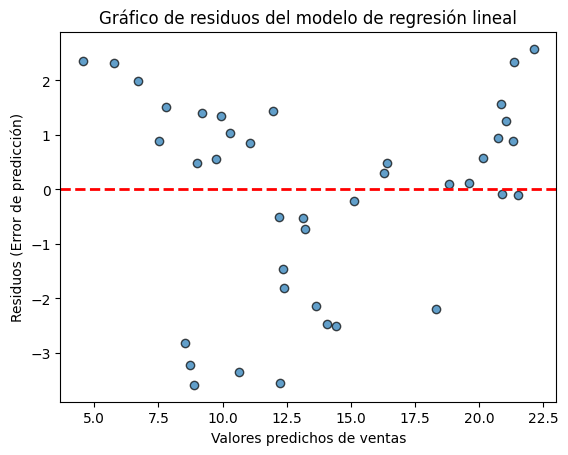

In [8]:
import matplotlib.pyplot as plt

residuos = y_test - y_pred

plt.scatter(y_pred, residuos, alpha = 0.7, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title("Gráfico de residuos del modelo de regresión lineal")
plt.xlabel("Valores predichos de ventas")
plt.ylabel("Residuos (Error de predicción)")
plt.show()


- (5-12) Los residuos tienen mayor dispersión y tendencia negativa.
- (20-22.5) Los residuos están más concentrados cerca de cero.
- El modelo es más preciso para predecir ventas altas.